## Loading data into Panda

In [1]:
import pandas as pd
from vega_datasets import data as vds

import matplotlib.pyplot as plt

import folium
from folium import plugins

import geocoder
import geopy

import numpy as np 

import seaborn as sns

import ipywidgets as widgets

from ipywidgets import interact


healthfacilities = pd.read_csv("health_facilities.csv")

pharmacies = pd.read_csv("pharmacy_list_kenya.csv")

population = pd.read_csv("population_list_kenya.csv")

geocodes = pd.read_csv("county_geocodes.csv")

hosp_count = pd.read_csv("hospital_per_county.csv")

pharm_count = pd.read_csv("pharmacies_per_county.csv")

hosp_and_pharm_count = pd.read_csv("hospital_and_pharmacy_count.csv")

hosp_pharm_and_geo =pd.read_csv('hospital_and_pharmacy_and_geo_count.csv')


print(healthfacilities)

healthfacilities.head(50)

       facility-code                                facility-name  \
0              19224                      _CDF_Kiriari_Dispensary   
1              19310  _St_Jude's_Huruma_Community_Health_Services   
2              14180                              10_Engineer_VCT   
3              17486                                 12_Engineers   
4              18393                 3Kl_Maternity_&_Nursing_Home   
...              ...                                          ...   
10500          17220                                     Ziwa_SDA   
10501          15788                   Ziwa_Sub-District_Hospital   
10502          11915                            Ziwani_Dispensary   
10503          16997                    Zombe_Catholic_Dispensary   
10504          20313                         Zombe_medical_clinic   

          province        county       district            division  \
0          Eastern          Embu       Manyatta            Manyatta   
1          Nairobi       Nair

,facility-code,facility-name,province,county,district,division,type,owner,sub-location,description-of-location,constituency,nearest-town,beds,cots,town,job-title-of-in-charge,open-24_hours,open-weekends,operational-status
0,19224,_CDF_Kiriari_Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry_of_Health,Ruguru,NaN,MANYATTA,Kiriari_-market,0.0,0.0,148,Nursing_Officer_in_Charge,NaN,NaN,Operational
1,19310,_St_Jude's_Huruma_Community_Health_Services,Nairobi,Nairobi,Mathare,Huruma,Medical_Clinic,Private_Practice_-_Unspecified,Huruma,Situated_near_Ndururumo_Primary_School_(Juja_R...,MATHARE,Kariobangi_Market,0.0,0.0,NaN,Clinical_Officer,N,Y,Operational
2,14180,10_Engineer_VCT,Rift_Valley,Laikipia,Laikipia_East,Central,Dispensary,Armed_Forces,Majengo,NaN,LAIKIPIA_EAST,Nanyuki,0.0,0.0,NaN,Medical_Superintendant,N,N,Operational
3,17486,12_Engineers,Central,Kiambu,Thika_West,NaN,Dispensary,Ministry_of_Health,NaN,NaN,JUJA,NaN,0.0,0.0,NaN,NaN,N,N,Operational
4,18393,3Kl_Maternity_&_Nursing_Home,Rift_Valley,Kajiado,Kajiado_North,Ongata_Rongai,Nursing_Home,Private_Practice_-_Clinical_Officer,Gataka,Gataka_Road,KAJIADO_NORTH,Ongata_Ronga,7.0,0.0,Langata,Clinical_Officer,Y,Y,Operational
5,14181,3KR_Health_Centre,Rift_Valley,Nakuru,Nakuru,Lanet,Health_Centre,Armed_Forces,Lanet,within_the_3KR_barracks_off_nakuru_ndudori_road,NAKURU_TOWN,Nakuru_Town,20.0,12.0,Nakuru,Nursing_Officer_in_Charge,Y,Y,Operational
6,11917,78_Tank_Battalion_Dispensary,Eastern,Isiolo,Isiolo,Central,Dispensary,Armed_Forces,East,NaN,ISIOLO_NORTH,Isiolo,7.0,2.0,Isiolo,Nursing_Officer_in_Charge,Y,Y,Operational
7,13043,7Kr_Mrs_Health_Centre,Nairobi,Nairobi,Langata,Lang'ata,Health_Centre,Armed_Forces,Mugumoini,"Next_to_Nairobi_Opharnage,Off_Lang'ata_rd.",LANG'ATA,Lang'ata_Shopping_Center,14.0,0.0,Nairobi,Nursing_Officer_in_Charge,Y,Y,Operational
8,14182,8Th_Street_Clinic,Rift_Valley,Kajiado,Kajiado_North,Isinya,Medical_Clinic,Private_Enterprise_(Institution),Isinya_Township,Isinya_Township,KAJIADO_NORTH,Isinya,0.0,0.0,Nairobi,Nursing_Officer_in_Charge,N,Y,Operational
9,18137,A_To_Z_Quality_Health_Family_Health_Services,Rift_Valley,Nakuru,Njoro,Njoro,Medical_Clinic,Private_Practice_-_Nurse_/_Midwife,Njoro,NaN,MOLO,Njoro_Centre,0.0,0.0,NaN,Nursing_Officer_in_Charge,N,Y,Operational


In [2]:
hosp_and_pharm_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 38 non-null     int64 
 1   county                     38 non-null     object
 2   hospital_per_county_count  38 non-null     int64 
 3   pharmacy_per_county_count  38 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [3]:
hosp_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  47 non-null     object
 1   county      47 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


In [4]:
pharm_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  47 non-null     object
 1   county      47 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


In [5]:
folium.Map?

In [6]:
folium.Map()

In [7]:
#Merge two csvs into one

hospital_and_pharmacy_count = pd.merge( hosp_count, pharm_count, on="county", how="inner")

hospital_and_pharmacy_count.to_csv('hospital_and_pharmacy_count.csv')

In [8]:
#Merge two csvs again into one

hospital_and_pharmacy_and_geo_count = pd.merge( hosp_and_pharm_count, geocodes, on="county", how="inner")

hospital_and_pharmacy_and_geo_count.to_csv('hospital_and_pharmacy_and_geo_count.csv')

In [9]:
center = [-0.023559, 37.9061928]
map_kenya = folium.Map(location=center, zoom_start=8)
#display map
map_kenya

In [10]:
for index, geocodes in geocodes.iterrows():
    location = [geocodes['latitude'], geocodes['longitude']]
    folium.Marker(location, popup = f'Name:{geocodes["county"]}\n').add_to(map_kenya)

#display the map
map_kenya
   

In [11]:
for index, hosp_pharm_and_geo in hosp_pharm_and_geo.iterrows():
    location = [hosp_pharm_and_geo['latitude'], hosp_pharm_and_geo['longitude']]
    folium.Marker(location, popup = f'Name: {hosp_pharm_and_geo["county"]}\n Hospital_count: {hosp_pharm_and_geo["hospital_per_county_count"]} \n Pharmacy_count: {hosp_pharm_and_geo["pharmacy_per_county_count"]} \n' ).add_to(map_kenya)

#display the map
map_kenya
   

In [12]:
print(pharmacies)

       code                            name                   official_name  \
0     25720                Itete Dispensary                Itete Dispensary   
1      None                      Mukavakava                      Mukavakava   
2      None              Nchurra Dispensary              Nchurra Dispensary   
3     25716              Kitaor  Dispensary              Kitaor  Dispensary   
4     25697               Emaira Dispensary               Emaira Dispensary   
...     ...                             ...                             ...   
5214  13319                Daley Dispensary                Daley Dispensary   
5215  13497  Bar Aluru Dispensary (Rarieda)  Bar Aluru Dispensary (Rarieda)   
5216  13311            Bour-Algy Dispensary            Bour-algy Dispensary   
5217  10834               Ndivai Dispensary               Ndivai Dispensary   
5218  10907      Oaklands Estate Dispensary       Oakland Estate Dispensary   

     registration_number keph_level facility_type f

In [13]:
print(population)

   Distribution of Population, Number of Households and Average Household Size by County  \
0   Source: 2019 Kenya Population and Housing Cens...                                      
1   https://www.knbs.or.ke/?wpdmpro=2019-kenya-pop...                                      
2   Population, Households, Household size, County...                                      
3                                                 NaN                                      
4                                                name                                      
5                                               Kenya                                      
6                                             Mombasa                                      
7                                               Kwale                                      
8                                              Kilifi                                      
9                                          Tana River                           

In [14]:
healthfacilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   facility-code            10505 non-null  int64  
 1   facility-name            10505 non-null  object 
 2   province                 10505 non-null  object 
 3   county                   10505 non-null  object 
 4   district                 10505 non-null  object 
 5   division                 10238 non-null  object 
 6   type                     10505 non-null  object 
 7   owner                    10505 non-null  object 
 8   sub-location             9613 non-null   object 
 9   description-of-location  5304 non-null   object 
 10  constituency             10505 non-null  object 
 11  nearest-town             9903 non-null   object 
 12  beds                     10418 non-null  float64
 13  cots                     10428 non-null  float64
 14  town                  

In [15]:
pharmacies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code                    5219 non-null   object 
 1   name                    5219 non-null   object 
 2   official_name           5219 non-null   object 
 3   registration_number     5193 non-null   object 
 4   keph_level              5219 non-null   object 
 5   facility_type           5219 non-null   object 
 6   facility_type_category  5219 non-null   object 
 7   owner                   5219 non-null   object 
 8   owner_type              5219 non-null   object 
 9   regulatory_body         5219 non-null   object 
 10  beds                    5219 non-null   int64  
 11  cots                    5219 non-null   int64  
 12  beds_and_cots           5219 non-null   int64  
 13  county                  5219 non-null   object 
 14  constituency            5219 non-null   

In [16]:
pharmacies['county'].value_counts()

Kitui              290
Makueni            210
Turkana            188
Baringo            182
Nakuru             181
Meru               178
Machakos           165
Kericho            158
Nandi              156
Muranga            149
Homa Bay           144
Nairobi            143
Kilifi             141
Nyeri              135
Kiambu             132
Migori             130
Kakamega           130
Uasin Gishu        129
West Pokot         125
Bungoma            124
Bomet              123
Kwale              111
Siaya              110
Narok              110
Embu               110
Kajiado             94
Elgeyo Marakwet     93
Tharaka Nithi       90
Laikipia            85
Kisii               83
Kirinyaga           77
Kisumu              76
Wajir               73
Busia               70
Nyamira             69
Marsabit            67
Nyandarua           66
Samburu             66
Garissa             63
Trans Nzoia         59
Mandera             58
Tana River          58
Taita Taveta        48
Vihiga     

In [17]:
pharmacies_per_county = pharmacies['county'].value_counts()

pharmacies_per_county.to_csv('pharmacies_per_county.csv')

pharmacies_per_county


Kitui              290
Makueni            210
Turkana            188
Baringo            182
Nakuru             181
Meru               178
Machakos           165
Kericho            158
Nandi              156
Muranga            149
Homa Bay           144
Nairobi            143
Kilifi             141
Nyeri              135
Kiambu             132
Migori             130
Kakamega           130
Uasin Gishu        129
West Pokot         125
Bungoma            124
Bomet              123
Kwale              111
Siaya              110
Narok              110
Embu               110
Kajiado             94
Elgeyo Marakwet     93
Tharaka Nithi       90
Laikipia            85
Kisii               83
Kirinyaga           77
Kisumu              76
Wajir               73
Busia               70
Nyamira             69
Marsabit            67
Nyandarua           66
Samburu             66
Garissa             63
Trans Nzoia         59
Mandera             58
Tana River          58
Taita Taveta        48
Vihiga     

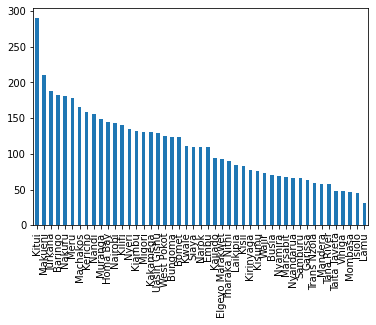

In [18]:
pharmacies['county'].value_counts().plot(kind = 'bar')

plt.rcParams['figure.figsize'] = [60,10]

In [19]:
healthfacilities.describe()

,facility-code,beds,cots
count,10505.000000,10418.000000,10428.000000
mean,15726.711471,5.432905,0.744342
std,3246.324955,29.862656,11.332022
min,10001.000000,0.000000,0.000000
25%,12957.000000,0.000000,0.000000
50%,15702.000000,0.000000,0.000000
75%,18569.000000,1.000000,0.000000
max,21281.000000,1455.000000,1000.000000


In [20]:
slider = widgets.IntSlider(min = 1, max = 100, v_model=30)
slider

IntSlider(value=1, min=1)

In [21]:
healthfacilities['county'].value_counts()

Nairobi            942
Kiambu             506
Meru               461
Nyeri              453
Nakuru             436
Kitui              421
Machakos           374
Mombasa            320
Kajiado            313
Makueni            291
Murang'a           284
Kakamega           281
Kilifi             265
Kirinyaga          249
Homa_Bay           239
Baringo            237
Migori             225
Kericho            210
Kisumu             207
Nandi              205
Uasin_Gishu        194
Bungoma            185
Narok              179
Siaya              178
Embu               177
Turkana            171
Kisii              169
Garissa            165
Wajir              158
Trans_Nzoia        155
Nyandarua          151
Bomet              143
Nyamira            140
Tharaka_Nithi      133
Elgeyo_Marakwet    133
West_Pokot         132
Laikipia           124
Kwale              124
Busia              118
Marsabit           115
Vihiga              97
Samburu             97
Taita_Taveta        92
Mandera    

In [22]:
hospital_per_county = healthfacilities['county'].value_counts()

hospital_per_county.to_csv('hospital_per_county.csv')

hospital_per_county


Nairobi            942
Kiambu             506
Meru               461
Nyeri              453
Nakuru             436
Kitui              421
Machakos           374
Mombasa            320
Kajiado            313
Makueni            291
Murang'a           284
Kakamega           281
Kilifi             265
Kirinyaga          249
Homa_Bay           239
Baringo            237
Migori             225
Kericho            210
Kisumu             207
Nandi              205
Uasin_Gishu        194
Bungoma            185
Narok              179
Siaya              178
Embu               177
Turkana            171
Kisii              169
Garissa            165
Wajir              158
Trans_Nzoia        155
Nyandarua          151
Bomet              143
Nyamira            140
Tharaka_Nithi      133
Elgeyo_Marakwet    133
West_Pokot         132
Laikipia           124
Kwale              124
Busia              118
Marsabit           115
Vihiga              97
Samburu             97
Taita_Taveta        92
Mandera    

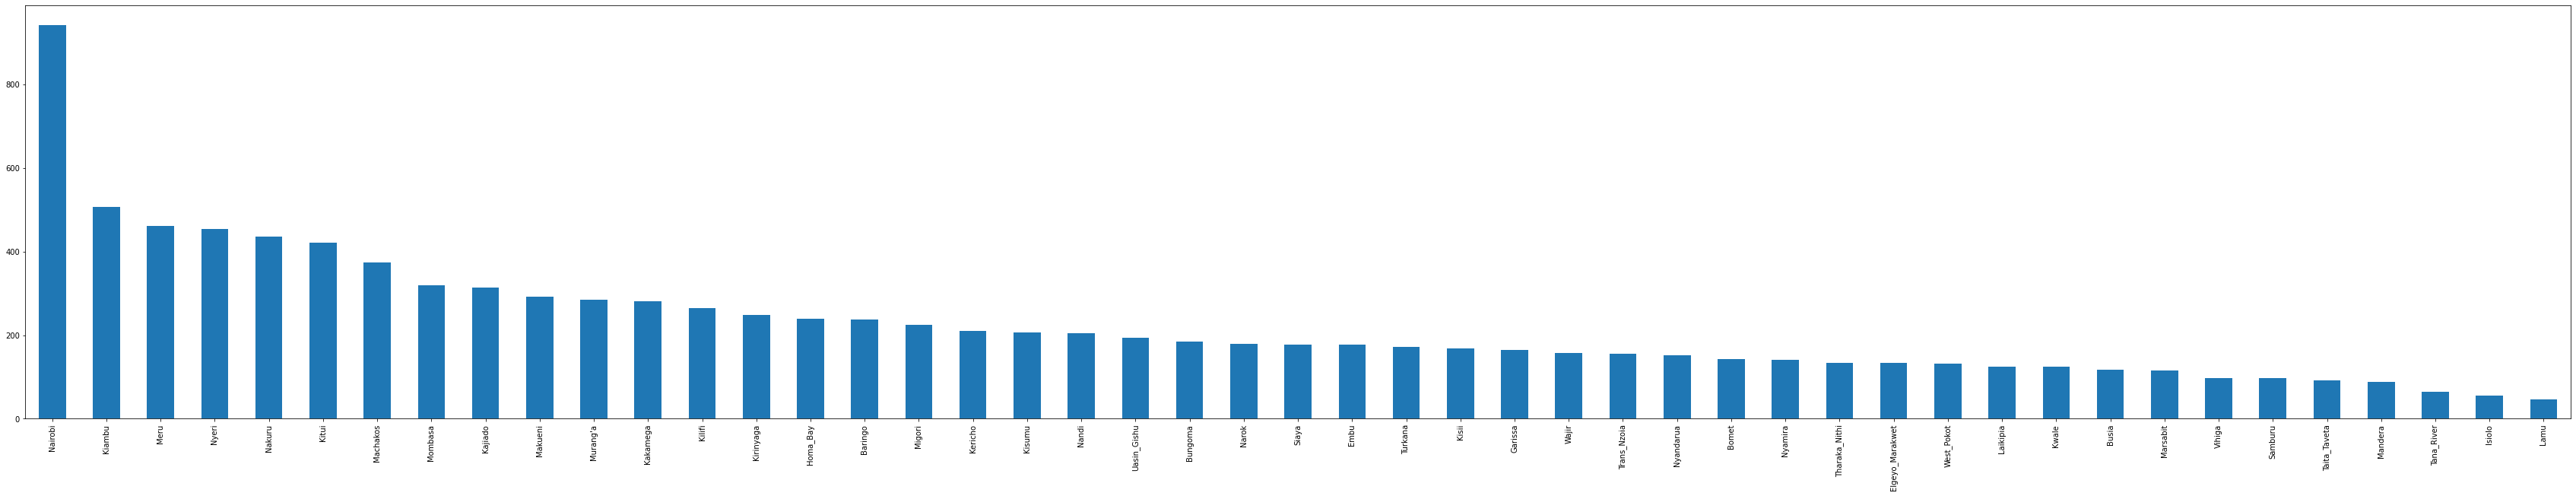

In [23]:
healthfacilities['county'].value_counts().plot(kind = 'bar')

plt.rcParams['figure.figsize'] = [60,10]

In [24]:
healthfacilities['owner'].value_counts()

Ministry_of_Health                                 4687
Private_Enterprise_(Institution)                   1366
Private_Practice_-_Nurse_/_Midwife                 1026
Private_Practice_-_Clinical_Officer                 615
Private_Practice_-_General_Practitioner             434
Kenya_Episcopal_Conference-Catholic_Secretariat     412
Christian_Health_Association_of_Kenya               390
Non-Governmental_Organizations                      350
Other_Faith_Based                                   283
Private_Practice_-_Unspecified                      242
Private_Practice_-_Medical_Specialist               169
Community                                           109
Local_Authority                                     106
Company_Medical_Service                              86
Other_Public_Institution                             81
Community_Development_Fund                           39
Academic_(if_registered)                             37
Armed_Forces                                    

In [25]:
pharmacies['owner'].value_counts()

Ministry of Health                                 4306
Christian Health Association of Kenya               249
Kenya Episcopal Conference-Catholic Secretariat     242
Other Faith Based                                   171
Private Practice - Private Institution Academic      51
Public Institution - Academic                        50
Private Practice - Private Company                   46
Non-Governmental Organizations                       22
Public Institution - Parastatal                      21
Armed Forces                                         14
Private Practice - Nurse / Midwifery                 14
Private Practice - Clinical Officer                  11
Supreme Council for Kenya Muslims                    10
Seventh Day Adventist                                 6
Private Practice - General Practitioner               4
Private Practice- Pharmacist                          2
Name: owner, dtype: int64

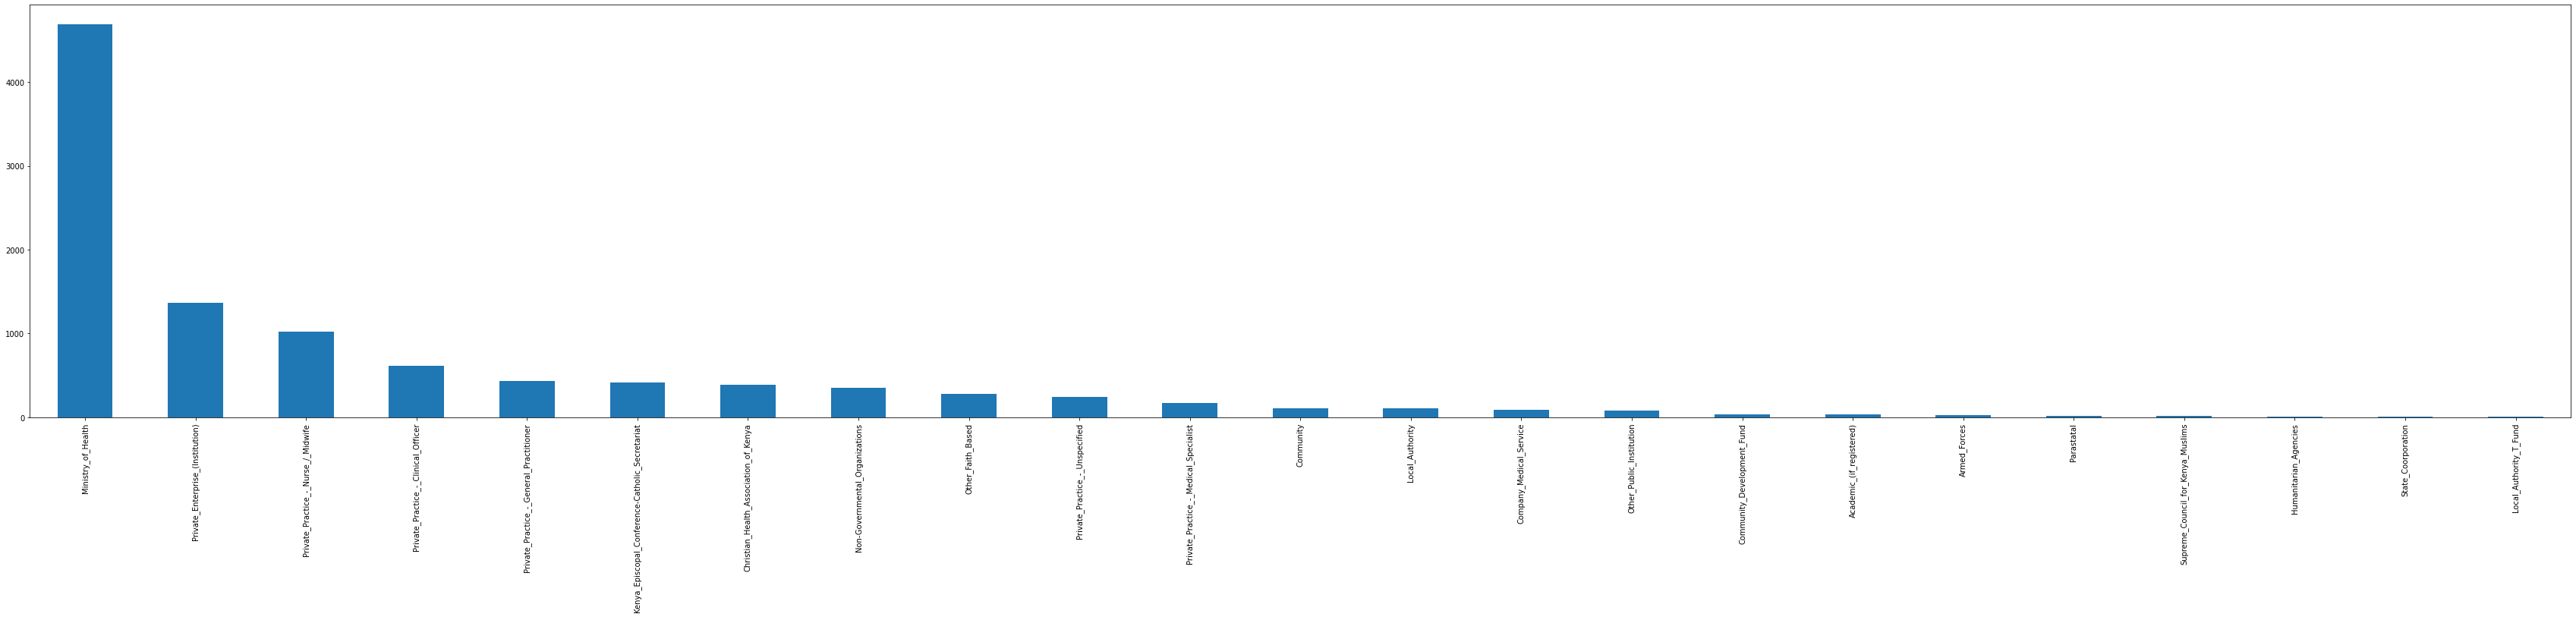

In [26]:
healthfacilities['owner'].value_counts().plot(kind = 'bar')

plt.rcParams['figure.figsize'] = [10,6]

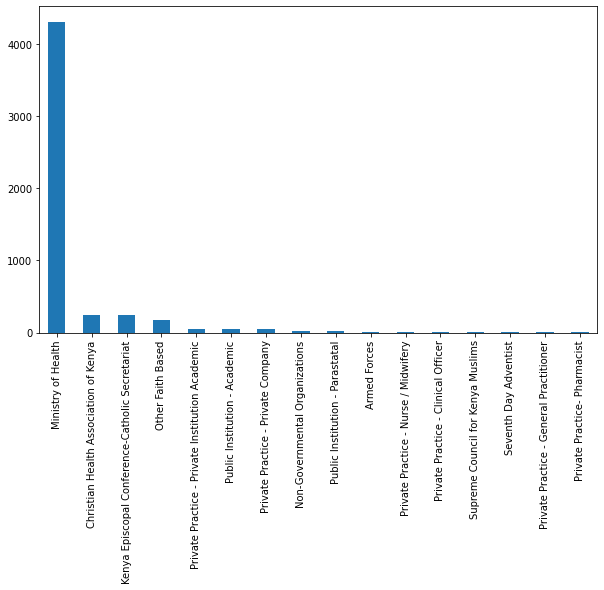

In [27]:
pharmacies['owner'].value_counts().plot(kind = 'bar')

plt.rcParams['figure.figsize'] = [10,6]

In [28]:
healthfacilities['type'].value_counts()

Dispensary                                      4820
Medical_Clinic                                  3360
Health_Centre                                   1126
Other_Hospital                                   256
Nursing_Home                                     208
VCT_Centre_(Stand-Alone)                         181
Sub-District_Hospital                            143
District_Hospital                                141
Laboratory_(Stand-alone)                          59
Maternity_Home                                    49
Medical_Centre                                    36
Dental_Clinic                                     30
Not_in_List                                       19
Health_Programme                                  15
Eye_Centre                                        10
Health_Project                                     9
Radiology_Unit                                     9
Provincial_General_Hospital                        9
Training_Institution_in_Health_(Stand-alone)  

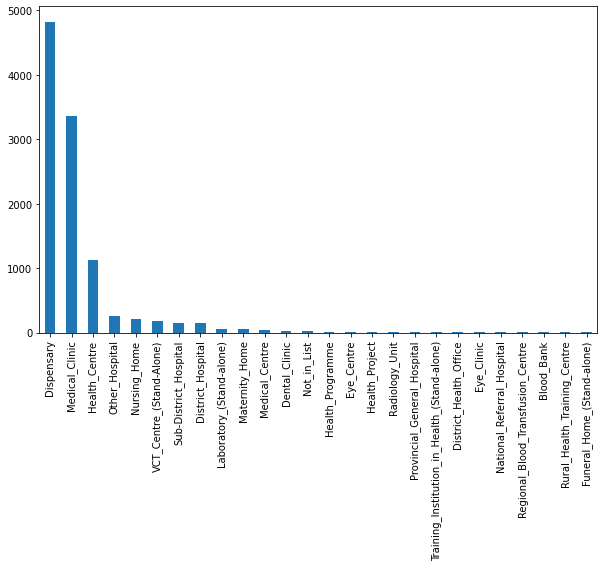

In [29]:
healthfacilities['type'].value_counts().plot(kind = 'bar')

plt.rcParams['figure.figsize'] = [10,6]

In [30]:
#Filtering for more than one characteristic 
healthfacilities.loc[(healthfacilities['county'] == 'Nairobi') & (healthfacilities['owner'] == 'Ministry_of_Health')]

,facility-code,facility-name,province,county,district,division,type,owner,sub-location,description-of-location,constituency,nearest-town,beds,cots,town,job-title-of-in-charge,open-24_hours,open-weekends,operational-status
241,13232,State_House_Dispensary_(Nairobi),Nairobi,Nairobi,Dagoretti_North,Kilimani,Dispensary,Ministry_of_Health,Kilimani,"Along_State_House_Road,_in__Nairobi_State_House",DAGORETTI_NORTH,Near_Hurlingham,0.0,0.0,Nairobi,Clinical_Officer,N,N,Operational
327,18344,Afya_House_Dispensary,Nairobi,Nairobi,Kibra,KNH_Golf_Course,Dispensary,Ministry_of_Health,Community,Within_Afya_House_Building,KIBRA,Community,0.0,0.0,Nairobi,Nursing_Officer_in_Charge,N,N,Operational
447,12909,Dagoretti_Approved_Dispensary,Nairobi,Nairobi,Dagoretti_South,Dagoretti,Dispensary,Ministry_of_Health,Kagondo,NaN,DAGORETTI_SOUTH,Dagoretti_Centre,0.0,0.0,NaN,Nursing_Officer_in_Charge,N,N,Operational
893,18505,KEMRI_Mimosa,Nairobi,Nairobi,Kibra,KNH_Golf_Course,Dispensary,Ministry_of_Health,Woodley,Mimosa_Market,KIBRA,Kentatta__Market,0.0,0.0,NaN,NaN,NaN,Y,Operational
895,13019,Kemri_VCT,Nairobi,Nairobi,Kibra,Kibra,VCT_Centre_(Stand-Alone),Ministry_of_Health,NaN,NaN,KIBRA,Nairobi,40.0,0.0,NaN,Nursing_Officer_in_Charge,N,N,Operational
897,18357,Kemsa_Staff_Clinic,Nairobi,Nairobi,Starehe,Viwandani,Dispensary,Ministry_of_Health,Landi_Mawe,off_Jogoo_Road_Enterprise_Road_Commercial_Stre...,STAREHE,City_Stadium,0.0,0.0,Nairobi,NaN,N,N,Operational
1102,20623,Lindi_Community_Clinic,Nairobi,Nairobi,Kibra,Kibra,Dispensary,Ministry_of_Health,Lindi,Near_the_Lindi_Mosque,KIBRA,NaN,0.0,0.0,Nairobi,Nursing_Officer_in_Charge,N,N,Operational
1154,13056,Makadara_Health_Centre,Nairobi,Nairobi,Makadara,Makadara,Health_Centre,Ministry_of_Health,Makadara,"off_Jogoo_Road,_Hamsa_Road_next_to_BBC_Church",MAKADARA,Nairobi,19.0,0.0,Nairobi,Nursing_Officer_in_Charge,Y,Y,Operational
1440,13078,Mathare_Police_Depot,Nairobi,Nairobi,Mathare,Central,Dispensary,Ministry_of_Health,NaN,NaN,MATHARE,Nairobi,0.0,0.0,NaN,NaN,N,N,Operational
1441,13076,Mathari_Hospital,Nairobi,Nairobi,Mathare,Kariokor,District_Hospital,Ministry_of_Health,NaN,situated_along_THIKA_Rd_opposite_Muthaiga_Poli...,MATHARE,Nairobi,700.0,0.0,Nairobi,Medical_Superintendant,Y,Y,Operational


In [31]:
healthfacilities.loc[(healthfacilities['county'] == 'Lamu') & (healthfacilities['owner'] == 'Ministry_of_Health')]

,facility-code,facility-name,province,county,district,division,type,owner,sub-location,description-of-location,constituency,nearest-town,beds,cots,town,job-title-of-in-charge,open-24_hours,open-weekends,operational-status
126,11799,Siu_Dispensary,Coast,Lamu,Lamu_East,Faza,Dispensary,Ministry_of_Health,Siu,NaN,LAMU_EAST,Siu,NaN,NaN,Lamu,NaN,N,N,Operational
559,11373,Faza_Hospital,Coast,Lamu,Lamu_East,Faza,Sub-District_Hospital,Ministry_of_Health,Faza,Near_Faza_Boys_Primary_School,LAMU_EAST,Faza,15.0,0.0,Lamu,Medical_Superintendant,Y,Y,Operational
1186,17692,Mapenya_Dispensary,Coast,Lamu,Lamu_West,Mpeketoni,Dispensary,Ministry_of_Health,Mapenya,Mpeketoni__Mkunumbi__road_near__mapenya_stage,LAMU_WEST,Mapenya,0.0,0.0,Mpeketoni,Nursing_Officer_in_Charge,N,N,Operational
1338,11579,Matondoni_Dispensary,Coast,Lamu,Lamu_West,Amu,Dispensary,Ministry_of_Health,Matondoni,NaN,LAMU_WEST,Matondoni,NaN,NaN,Lamu,NaN,N,N,Operational
1953,11512,Lamu_District_Hospital,Coast,Lamu,Lamu_West,Amu,District_Hospital,Ministry_of_Health,Langoni,Next_to_Fisheries_offices,LAMU_WEST,Lamu_,60.0,20.0,Lamu,Medical_Superintendant,Y,Y,Operational
2179,11560,Mangai_Dispensary,Coast,Lamu,Lamu_East,Kiunga,Dispensary,Ministry_of_Health,Mangai,MANGAI_TOWN,LAMU_EAST,Mangai,0.0,0.0,Lamu,Nursing_Officer_in_Charge,N,N,Operational
2216,11485,Kipungani_Dispensary,Coast,Lamu,Lamu_West,Amu,Dispensary,Ministry_of_Health,Kipungani,NaN,LAMU_WEST,Kipungani,0.0,0.0,Lamu,Nursing_Officer_in_Charge,N,N,Not-Operational
2396,11492,Kiunga_Health_Centre,Coast,Lamu,Lamu_East,Kiunga,Health_Centre,Ministry_of_Health,Kiunga,NaN,LAMU_EAST,Kiunga,4.0,0.0,Lamu,NaN,N,N,Operational
2618,11594,Mbwajumwali_Dispensary,Coast,Lamu,Lamu_East,Kizingitini,Dispensary,Ministry_of_Health,Mbwajumwali,MBWAJUMWALI_VILLAGE_NEXT_TO_KIZINGITINI,LAMU_EAST,Mbwajumwali,0.0,0.0,Lamu,Nursing_Officer_in_Charge,N,N,Operational
2906,11628,Mkokoni_Dispensary,Coast,Lamu,Lamu_East,Kiunga,Dispensary,Ministry_of_Health,Mkokoni,NaN,LAMU_EAST,Mkokoni,0.0,0.0,Lamu,Nursing_Officer_in_Charge,N,N,Operational


In [32]:
healthfacilities.loc[healthfacilities['county'] == 'Nairobi']

,facility-code,facility-name,province,county,district,division,type,owner,sub-location,description-of-location,constituency,nearest-town,beds,cots,town,job-title-of-in-charge,open-24_hours,open-weekends,operational-status
1,19310,_St_Jude's_Huruma_Community_Health_Services,Nairobi,Nairobi,Mathare,Huruma,Medical_Clinic,Private_Practice_-_Unspecified,Huruma,Situated_near_Ndururumo_Primary_School_(Juja_R...,MATHARE,Kariobangi_Market,0.0,0.0,NaN,Clinical_Officer,N,Y,Operational
7,13043,7Kr_Mrs_Health_Centre,Nairobi,Nairobi,Langata,Lang'ata,Health_Centre,Armed_Forces,Mugumoini,"Next_to_Nairobi_Opharnage,Off_Lang'ata_rd.",LANG'ATA,Lang'ata_Shopping_Center,14.0,0.0,Nairobi,Nursing_Officer_in_Charge,Y,Y,Operational
10,20346,AAR_Adams_Health_Centre,Nairobi,Nairobi,Kibra,Woodly,Medical_Clinic,Private_Practice_-_General_Practitioner,Woodly,Greenhouse_Adams_1st_Floor,KIBRA,Adams,0.0,0.0,Nairobi,Medical_Superintendant,N,Y,Operational
11,12861,AAR_City_Centre_Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical_Clinic,Private_Enterprise_(Institution),NaN,Stiuated_at_ICEA_Building_along_Kenyatta_Avenu...,STAREHE,Nairobi,0.0,0.0,Nairobi,Doctor_In_Charge,N,Y,Operational
12,16796,AAR_Clinic_Sarit_Centre_(Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical_Clinic,Private_Enterprise_(Institution),Upper_Parklands,In_Sarit_Centre_westlands,WESTLANDS,Nairobi,0.0,0.0,NaN,Nursing_Officer_in_Charge,N,N,Operational
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10459,13260,Woodstreet_Nursing_Home,Nairobi,Nairobi,Kamukunji,Eastleigh_North,Nursing_Home,Private_Enterprise_(Institution),NaN,NaN,KAMUKUNJI,Nairobi,10.0,0.0,NaN,NaN,N,N,Operational
10493,19273,Zimerbreeze_Medical_Centre,Nairobi,Nairobi,Roysambu,Kasarani,Medical_Clinic,Private_Practice_-_General_Practitioner,Zimerman,Thika_rd_oof_kamiti_roadjust_behind_co-operati...,ROYSAMBU,just_behind_co-operative_bank_zimerman,0.0,0.0,NaN,Clinical_Officer,N,Y,Operational
10494,19378,Zimma_Health_Care,Nairobi,Nairobi,Roysambu,Kasarani,Medical_Clinic,Private_Practice_-_General_Practitioner,zimmerman,Next_to_index_medical_centre,ROYSAMBU,Next_to_index_medical_centre,0.0,0.0,NaN,Clinical_Officer,N,Y,Operational
10495,13261,Zimmerman_Medical_Dispensary,Nairobi,Nairobi,Ruaraka,Kasarani,Dispensary,Private_Enterprise_(Institution),NaN,NaN,ROYSAMBU,Nairobi,0.0,0.0,NaN,NaN,N,N,Operational


In [33]:
nairobi = healthfacilities.loc[healthfacilities['county'] == 'Nairobi'] 

nairobi.to_csv('nairobi.csv')

nairobi

,facility-code,facility-name,province,county,district,division,type,owner,sub-location,description-of-location,constituency,nearest-town,beds,cots,town,job-title-of-in-charge,open-24_hours,open-weekends,operational-status
1,19310,_St_Jude's_Huruma_Community_Health_Services,Nairobi,Nairobi,Mathare,Huruma,Medical_Clinic,Private_Practice_-_Unspecified,Huruma,Situated_near_Ndururumo_Primary_School_(Juja_R...,MATHARE,Kariobangi_Market,0.0,0.0,NaN,Clinical_Officer,N,Y,Operational
7,13043,7Kr_Mrs_Health_Centre,Nairobi,Nairobi,Langata,Lang'ata,Health_Centre,Armed_Forces,Mugumoini,"Next_to_Nairobi_Opharnage,Off_Lang'ata_rd.",LANG'ATA,Lang'ata_Shopping_Center,14.0,0.0,Nairobi,Nursing_Officer_in_Charge,Y,Y,Operational
10,20346,AAR_Adams_Health_Centre,Nairobi,Nairobi,Kibra,Woodly,Medical_Clinic,Private_Practice_-_General_Practitioner,Woodly,Greenhouse_Adams_1st_Floor,KIBRA,Adams,0.0,0.0,Nairobi,Medical_Superintendant,N,Y,Operational
11,12861,AAR_City_Centre_Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical_Clinic,Private_Enterprise_(Institution),NaN,Stiuated_at_ICEA_Building_along_Kenyatta_Avenu...,STAREHE,Nairobi,0.0,0.0,Nairobi,Doctor_In_Charge,N,Y,Operational
12,16796,AAR_Clinic_Sarit_Centre_(Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical_Clinic,Private_Enterprise_(Institution),Upper_Parklands,In_Sarit_Centre_westlands,WESTLANDS,Nairobi,0.0,0.0,NaN,Nursing_Officer_in_Charge,N,N,Operational
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10459,13260,Woodstreet_Nursing_Home,Nairobi,Nairobi,Kamukunji,Eastleigh_North,Nursing_Home,Private_Enterprise_(Institution),NaN,NaN,KAMUKUNJI,Nairobi,10.0,0.0,NaN,NaN,N,N,Operational
10493,19273,Zimerbreeze_Medical_Centre,Nairobi,Nairobi,Roysambu,Kasarani,Medical_Clinic,Private_Practice_-_General_Practitioner,Zimerman,Thika_rd_oof_kamiti_roadjust_behind_co-operati...,ROYSAMBU,just_behind_co-operative_bank_zimerman,0.0,0.0,NaN,Clinical_Officer,N,Y,Operational
10494,19378,Zimma_Health_Care,Nairobi,Nairobi,Roysambu,Kasarani,Medical_Clinic,Private_Practice_-_General_Practitioner,zimmerman,Next_to_index_medical_centre,ROYSAMBU,Next_to_index_medical_centre,0.0,0.0,NaN,Clinical_Officer,N,Y,Operational
10495,13261,Zimmerman_Medical_Dispensary,Nairobi,Nairobi,Ruaraka,Kasarani,Dispensary,Private_Enterprise_(Institution),NaN,NaN,ROYSAMBU,Nairobi,0.0,0.0,NaN,NaN,N,N,Operational


In [34]:
nairobi['owner'].value_counts()

Private_Enterprise_(Institution)                   219
Private_Practice_-_General_Practitioner            161
Non-Governmental_Organizations                     116
Private_Practice_-_Unspecified                      63
Local_Authority                                     58
Ministry_of_Health                                  56
Kenya_Episcopal_Conference-Catholic_Secretariat     49
Private_Practice_-_Nurse_/_Midwife                  40
Private_Practice_-_Clinical_Officer                 39
Private_Practice_-_Medical_Specialist               34
Other_Faith_Based                                   26
Christian_Health_Association_of_Kenya               24
Other_Public_Institution                            13
Community                                           11
Armed_Forces                                         9
Parastatal                                           7
Academic_(if_registered)                             6
Humanitarian_Agencies                                3
State_Coor

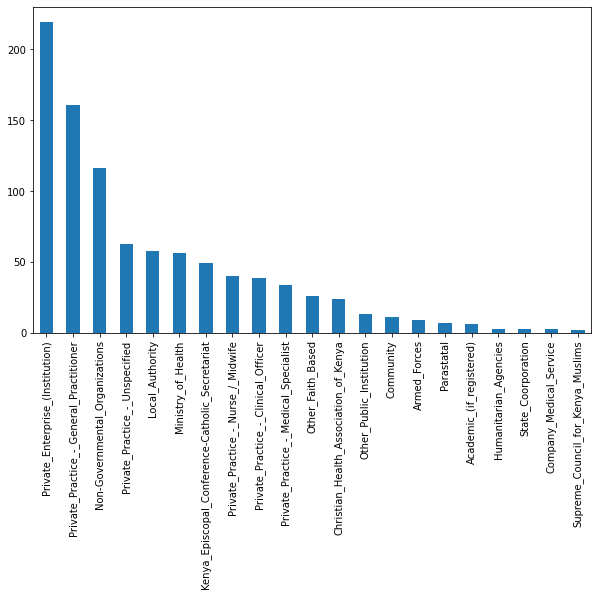

In [35]:
nairobi['owner'].value_counts().plot(kind = 'bar')

plt.rcParams['figure.figsize'] = [10,6]

In [36]:
lamu = healthfacilities.loc[healthfacilities['county'] == 'Lamu'] 

lamu.to_csv('lamu.csv')

lamu

,facility-code,facility-name,province,county,district,division,type,owner,sub-location,description-of-location,constituency,nearest-town,beds,cots,town,job-title-of-in-charge,open-24_hours,open-weekends,operational-status
112,16202,Baraka_Medical_Clinic_(Lamu),Coast,Lamu,Lamu_East,Mpeketoni,Medical_Clinic,Private_Practice_-_Clinical_Officer,Mpeketoni,near_Havannah_Hotel,LAMU_EAST,Mpeketoni,0.0,0.0,Mpeketoni,Clinical_Officer,N,Y,Operational
126,11799,Siu_Dispensary,Coast,Lamu,Lamu_East,Faza,Dispensary,Ministry_of_Health,Siu,NaN,LAMU_EAST,Siu,NaN,NaN,Lamu,NaN,N,N,Operational
138,11800,Sloam_Medical_Clinic,Coast,Lamu,Lamu_West,Mpeketoni,Medical_Clinic,Private_Practice_-_Nurse_/_Midwife,Mpeketoni,NaN,LAMU_WEST,Mpeketoni,0.0,0.0,Lamu,NaN,N,N,Operational
559,11373,Faza_Hospital,Coast,Lamu,Lamu_East,Faza,Sub-District_Hospital,Ministry_of_Health,Faza,Near_Faza_Boys_Primary_School,LAMU_EAST,Faza,15.0,0.0,Lamu,Medical_Superintendant,Y,Y,Operational
672,11412,Hongwe_Catholic_Dispensary,Coast,Lamu,Lamu_West,Mpeketoni,Dispensary,Kenya_Episcopal_Conference-Catholic_Secretariat,Hongwe,Mpeketoni=Kibaoni-Mombasa_highway,LAMU_WEST,Hongwe,0.0,0.0,Lamu,Nursing_Officer_in_Charge,N,N,Operational
673,11413,Hongwe_Clinic,Coast,Lamu,Lamu_West,Mpeketoni,Medical_Clinic,Private_Practice_-_Nurse_/_Midwife,Hongwe,NaN,LAMU_WEST,Hongwe,0.0,0.0,Lamu,NaN,N,N,Operational
1186,17692,Mapenya_Dispensary,Coast,Lamu,Lamu_West,Mpeketoni,Dispensary,Ministry_of_Health,Mapenya,Mpeketoni__Mkunumbi__road_near__mapenya_stage,LAMU_WEST,Mapenya,0.0,0.0,Mpeketoni,Nursing_Officer_in_Charge,N,N,Operational
1222,11565,Maria_Teressa_Nuzzo_Health_Centre,Coast,Lamu,Lamu_West,Mpeketoni,Health_Centre,Kenya_Episcopal_Conference-Catholic_Secretariat,Baharini,Baharini_town_next_to_sacred_heart_secondary_s...,LAMU_WEST,Baharini,6.0,0.0,Mpeketoni,Nursing_Officer_in_Charge,N,N,Operational
1338,11579,Matondoni_Dispensary,Coast,Lamu,Lamu_West,Amu,Dispensary,Ministry_of_Health,Matondoni,NaN,LAMU_WEST,Matondoni,NaN,NaN,Lamu,NaN,N,N,Operational
1952,11511,Lamu_Clinic,Coast,Lamu,Lamu_West,Amu,Medical_Clinic,Private_Practice_-_Nurse_/_Midwife,Mkomani,NaN,LAMU_WEST,Lamu_,0.0,0.0,Lamu,NaN,N,N,Not-Operational


In [37]:
lamu['owner'].value_counts()

Ministry_of_Health                                 27
Private_Practice_-_Clinical_Officer                 8
Private_Practice_-_Nurse_/_Midwife                  5
Kenya_Episcopal_Conference-Catholic_Secretariat     2
Private_Enterprise_(Institution)                    2
Non-Governmental_Organizations                      1
Community                                           1
Other_Public_Institution                            1
Name: owner, dtype: int64

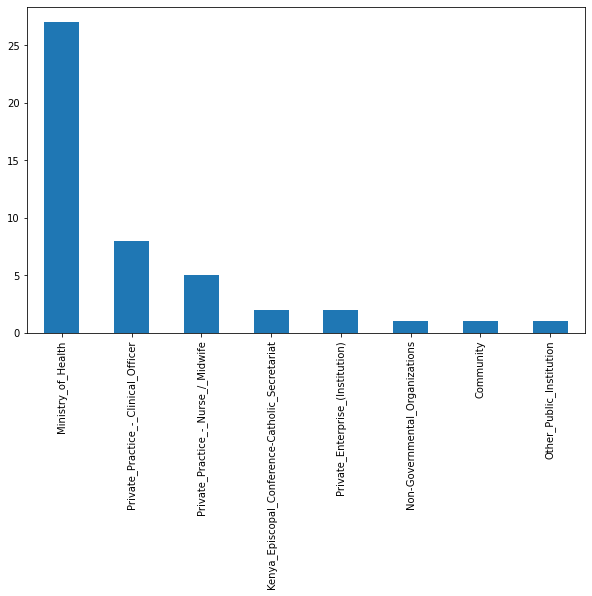

In [38]:
lamu['owner'].value_counts().plot(kind = 'bar')

plt.rcParams['figure.figsize'] = [10,6]

In [39]:
lamu['operational-status'].value_counts()

Operational        44
Not-Operational     3
Name: operational-status, dtype: int64

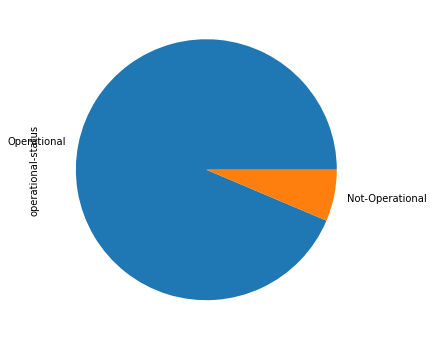

In [40]:
lamu['operational-status'].value_counts().plot(kind = 'pie')

plt.rcParams['figure.figsize'] = [10,6]